# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [3]:
import pandas as pd
import numpy as np


## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [4]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

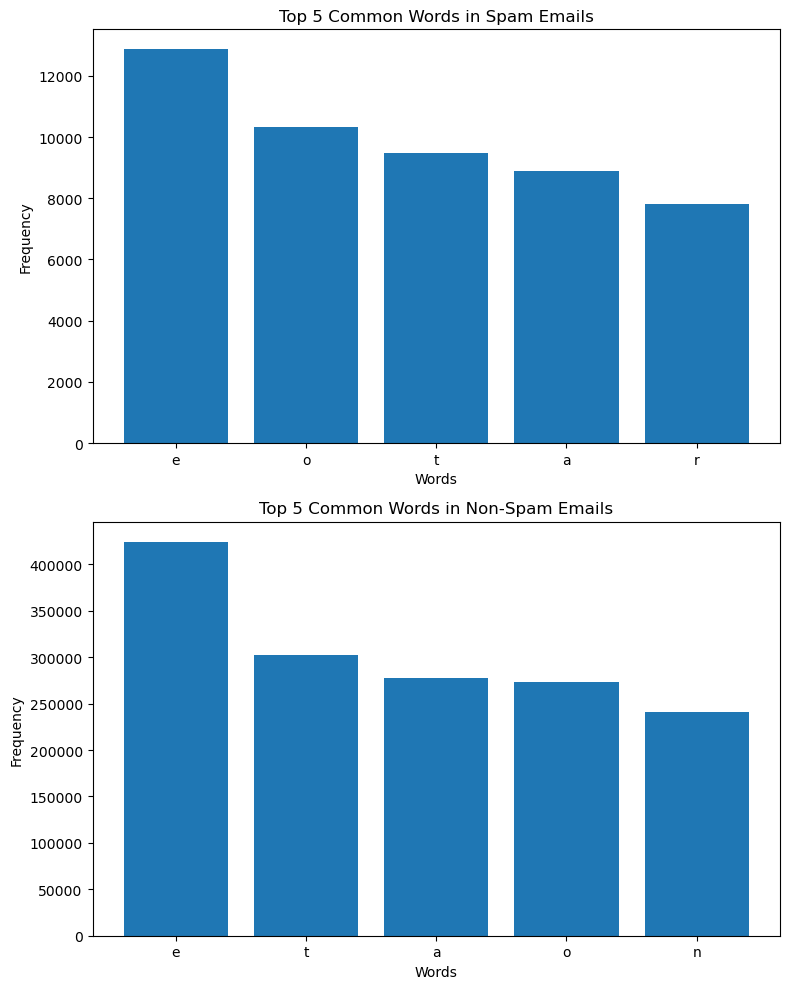

In [18]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emails_df = pd.read_csv('emails.csv')

# Filter spam and non-spam emails
spam_emails = emails_df[emails_df['spam'] == 1]
non_spam_emails = emails_df[emails_df['spam'] == 0]

# Get the top 5 common words in spam emails
spam_word_counts = spam_emails.iloc[:, 2:].sum().nlargest(5)

# Get the top 5 common words in non-spam emails
non_spam_word_counts = non_spam_emails.iloc[:, 2:].sum().nlargest(5)

# Plotting the histograms
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Histogram for spam emails
axes[0].bar(spam_word_counts.index, spam_word_counts.values)
axes[0].set_title('Top 5 Common Words in Spam Emails')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')

# Histogram for non-spam emails
axes[1].bar(non_spam_word_counts.index, non_spam_word_counts.values)
axes[1].set_title('Top 5 Common Words in Non-Spam Emails')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Figuring out some comparatively more important features

In [6]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load the dataset
df = pd.read_csv('emails.csv')

# Separate the features (words) from the target variable (spam)
X = df.drop(['Email No.', 'spam'], axis=1)
y = df['spam']

# Select the top 1.5K features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=1500)
selected_features = selector.fit_transform(X, y)

# Get the column indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_columns = X.columns[selected_indices]

# Subset the dataset with the selected features
selected_df = pd.concat([df[['Email No.', 'spam']], X[selected_columns]], axis=1)

# Save the reduced dataset to a new CSV file
selected_df.to_csv('reduced_emails.csv', index=False)

In [7]:
selected_df.head()


,Email No.,spam,the,to,and,for,of,a,you,in,...,ended,fall,fear,hate,australia,plain,lay,allowing,ff,Prediction
0,Email 1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,0,8,13,6,6,2,102,1,18,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,0,0,0,0,0,8,0,4,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,0,5,0,5,1,51,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,0,7,6,1,5,2,57,0,3,...,0,0,0,0,0,0,0,0,1,0


## Train - Test Split

In [12]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X = df.drop(['Email No.', 'spam'], axis=1)
y = df['spam']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and test sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (4137, 3000) (4137,)
Test data shape: (1035, 3000) (1035,)


## Making Predictions using Multinomial NB Classifier

In [13]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.957487922705314
ROC-AUC Score: 0.8436168323863636


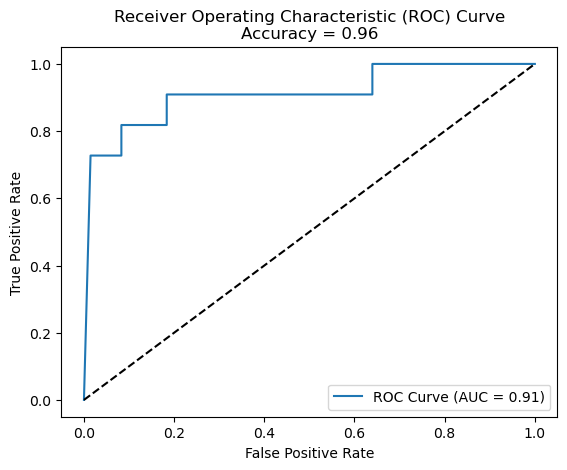

In [16]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict the labels for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC-AUC score of the model on the test data
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the accuracy and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy = {:.2f}'.format(accuracy))
plt.legend(loc='lower right')
plt.show()

## Plot the confusion Matrix

Accuracy: 0.957487922705314


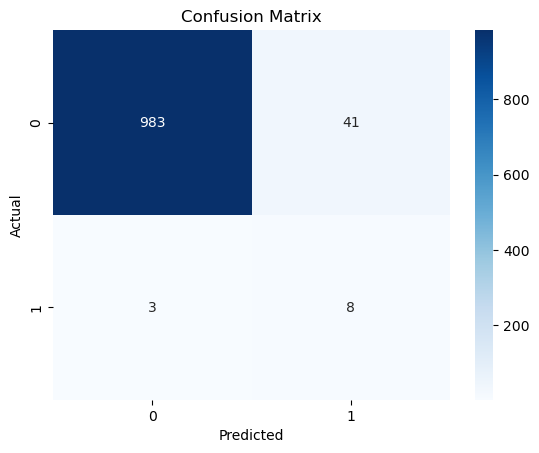

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

# Choose any five words of your choice
words = ['the', 'in', 'on', 're', 'an']

# Select the columns corresponding to the chosen words and 'spam' column
selected_columns = ['spam'] + words
selected_df = df[selected_columns]

# Split the data into X (features) and y (labels)
X = selected_df[words]
y = selected_df['spam']

# Train the Multinomial Naive Bayes classifier
classifier1 = MultinomialNB()
classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Trying out with SVMs

Accuracy: 0.9893719806763285


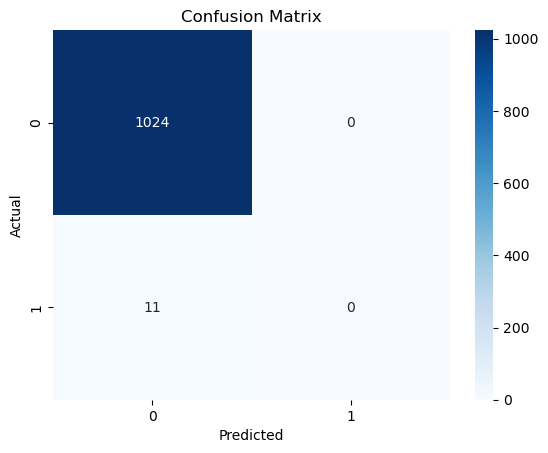

In [34]:
# Try using Support Vector Classifier (SVC) from scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Choose any five words of your choice
words = ['the', 'in', 'on', 're', 'an']

# Select the columns corresponding to the chosen words and 'spam' column
selected_columns = ['spam'] + words
selected_df = df[selected_columns]

# Split the data into X (features) and y (labels)
X = selected_df[words]
y = selected_df['spam']

# Train the Support Vector Classifier
classifier2 = SVC()
classifier2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

## Comparing the models

In [35]:
# Which model performed better?
from sklearn.metrics import accuracy_score

# Make predictions using Model 1 (Multinomial Naive Bayes)
y_pred_model1 = classifier1.predict(X_test)

# Make predictions using Model 2 (SVC)
y_pred_model2 = classifier2.predict(X_test)

# Calculate the accuracy of Model 1
accuracy_model1 = accuracy_score(y_test, y_pred_model1)

# Calculate the accuracy of Model 2
accuracy_model2 = accuracy_score(y_test, y_pred_model2)

# Compare the accuracy scores
if accuracy_model1 > accuracy_model2:
    print("Model 1 (Multinomial Naive Bayes) performed better with an accuracy of", accuracy_model1)
elif accuracy_model2 > accuracy_model1:
    print("Model 2 (SVC) performed better with an accuracy of", accuracy_model2)
else:
    print("Both models have the same accuracy of", accuracy_model1)


# Can you suggest some reason for better performance of one model over the other?
Support Vector Classifier (SVC) may have performed better than the Multinomial Naive Bayes (NB) classifier due to its ability to
handle complex decision boundaries, imbalanced data.

Model 2 (SVC) performed better with an accuracy of 0.9893719806763285


## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [37]:
import pandas as pd

def create_word_frequency_dataset(string):
    word_counts = pd.Series(string.split()).value_counts()
    dataset = pd.DataFrame({'Frequency': word_counts})
    dataset.index.name = 'Word'
    return dataset

# Example usage
string = "I am a Python developer and currently working on a project to classify mails"
dataset = create_word_frequency_dataset(string)
print(dataset)


           Frequency
Word                
a                  2
I                  1
am                 1
Python             1
developer          1
and                1
currently          1
working            1
on                 1
project            1
to                 1
classify           1
mails              1
